In [1]:
# 8.write a program to perform unsupervised K-means clustering techniques.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
def kmeans(X, K, max_iters):
    # Use the first K data points as the initial centroids
    centroids = X[:K]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update the centroids based on the assigned points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # If the centroids did not change, stop iterating
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids
X=np.array(df.iloc[:,:-1].values)
labels,c=kmeans(X,3,200)
print(labels)
print(c)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[[6.83571429 3.06428571 5.6547619 ]
 [5.84655172 2.73275862 4.3637931 ]
 [5.006      3.428      1.462     ]]


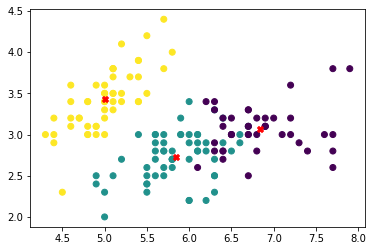

In [3]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(c[:,0],c[:,1],marker='X',color='red')
plt.show()